In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas_datareader as web
df=web.DataReader('GOOG', data_source='yahoo', start='2013-01-01', end='2018-05-04')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,362.142609,356.937103,358.366760,360.274597,5101651.0,360.274597
2013-01-03,364.598389,359.014313,361.111481,360.483826,4653778.0,360.483826
2013-01-04,369.350586,362.481323,363.308228,367.607117,5547717.0,367.607117
2013-01-07,368.309479,363.925903,366.351837,366.003143,3323812.0,366.003143
2013-01-08,366.775238,360.862396,366.396667,365.280823,3364765.0,365.280823
...,...,...,...,...,...,...
2018-04-30,1037.000000,1016.849976,1030.010010,1017.330017,1671300.0,1017.330017
2018-05-01,1038.469971,1008.210022,1013.659973,1037.310059,1427900.0,1037.310059
2018-05-02,1040.389038,1022.869995,1028.099976,1024.380005,1603100.0,1024.380005


In [3]:
df.shape

(1345, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345 entries, 2013-01-02 to 2018-05-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1345 non-null   float64
 1   Low        1345 non-null   float64
 2   Open       1345 non-null   float64
 3   Close      1345 non-null   float64
 4   Volume     1345 non-null   float64
 5   Adj Close  1345 non-null   float64
dtypes: float64(6)
memory usage: 73.6 KB


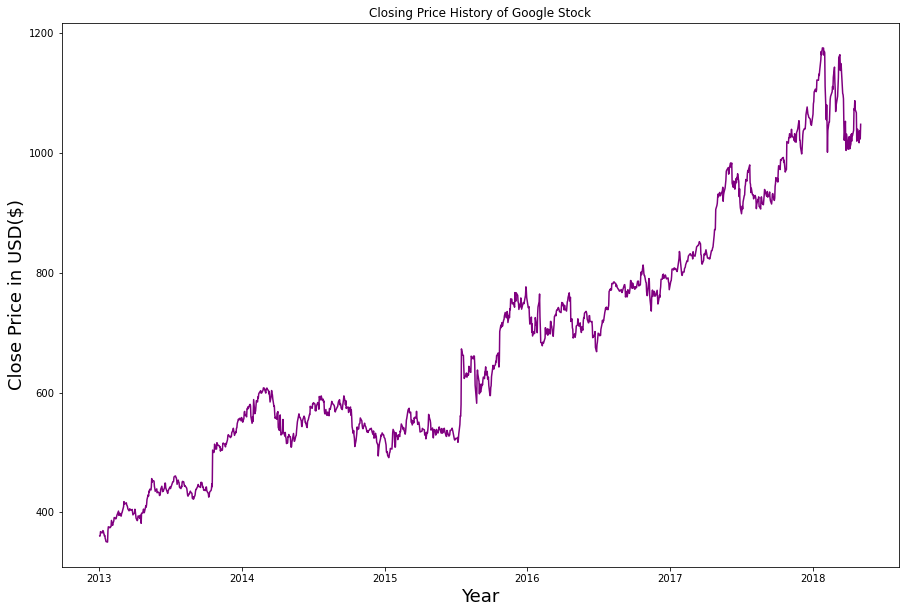

In [5]:
plt.figure(figsize=(15,10))
plt.title("Closing Price History of Google Stock")
plt.plot(df['Close'],color='purple')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Close Price in USD($)", fontsize=18)
plt.show()

In [6]:
df_close= df.filter(['Close'])
ds= df_close.values
training_data= math.ceil (len(ds) * .8) #computing the no of rows we are using 80% and then rounding of the values 
training_data

1076

In [7]:
ds

array([[ 360.27459717],
       [ 360.48382568],
       [ 367.6071167 ],
       ...,
       [1024.38000488],
       [1023.7199707 ],
       [1048.20996094]])

In [8]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(ds)
scale_data

array([[0.0122947 ],
       [0.01254809],
       [0.02117488],
       ...,
       [0.81657165],
       [0.81577231],
       [0.84543136]])

In [9]:
data_train=scale_data[0:training_data, :]
x_train= []
y_train= []

for i in range(60, len(data_train)):
    x_train.append(data_train[i-60:i, 0])
    y_train.append(data_train[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.0122947 , 0.01254809, 0.02117488, 0.01923236, 0.01835758,
       0.02126536, 0.02329237, 0.02239349, 0.0122947 , 0.01330822,
       0.00743232, 0.00509766, 0.00098939, 0.        , 0.02330445,
       0.03097205, 0.03064626, 0.02887264, 0.03065232, 0.03074279,
       0.03186487, 0.04387605, 0.03387376, 0.03792778, 0.04060028,
       0.04288064, 0.04977003, 0.04799035, 0.04695273, 0.04825579,
       0.05124805, 0.05430662, 0.06272833, 0.05404721, 0.05589925,
       0.05842096, 0.0530277 , 0.05264159, 0.05846317, 0.05931983,
       0.06233017, 0.07156627, 0.08188223, 0.07752659, 0.07826259,
       0.07761107, 0.07960186, 0.07525225, 0.07386474, 0.0715904 ,
       0.06722271, 0.06329539, 0.06542496, 0.06747004, 0.06538874,
       0.06481566, 0.06441144, 0.06608856, 0.0602006 , 0.05509089])]
[0.05931381054994611]

[array([0.0122947 , 0.01254809, 0.02117488, 0.01923236, 0.01835758,
       0.02126536, 0.02329237, 0.02239349, 0.0122947 , 0.01330822,
       0.00743232, 0.00509766, 0.00

In [10]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [11]:
x_train.shape

(1016, 60)

In [12]:
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [13]:
x_train.shape

(1016, 60, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))#first layer we give it input shape no of time steps and features
model.add(LSTM(50, return_sequences=False)) #we are not adding any layers
model.add(Dense(25)) #dense layer having 25 neurons
model.add(Dense(1)) #last layer with 1 neuron

In [16]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#train the model
model.fit(x_train, y_train, batch_size=64, epochs=4)

Epoch 1/4
16/16 [==============================] - 15s 118ms/step - loss: 0.0317
Epoch 2/4
16/16 [==============================] - 1s 92ms/step - loss: 0.0036
Epoch 3/4
16/16 [==============================] - 2s 104ms/step - loss: 0.0013
Epoch 4/4
16/16 [==============================] - 2s 107ms/step - loss: 5.4964e-04


In [18]:
data_test = scale_data[training_data-60: , :]
#create x_test, y_test
x_test=[]
y_test = ds[training_data: , : ]#values that we want our model to predict

for i in range(60, len(data_test)):
    x_test.append(data_test[i-60:i, 0])

In [19]:
x_test= np.array(x_test)

In [20]:
#shaping the data
x_test.shape

(269, 60)

In [21]:
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
x_test.shape

(269, 60, 1)

In [22]:
#models predicting price values fpr x_test dataset
predictions= model.predict(x_test) # we want this to be same as what we would get in y inverse transform
predictions= scaler.inverse_transform(predictions)#like we are unscaling the values 

In [23]:
#get the rmse its good measure of how accurate the model predicts the response the lower values indicate a good fit
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

8.400669253891728

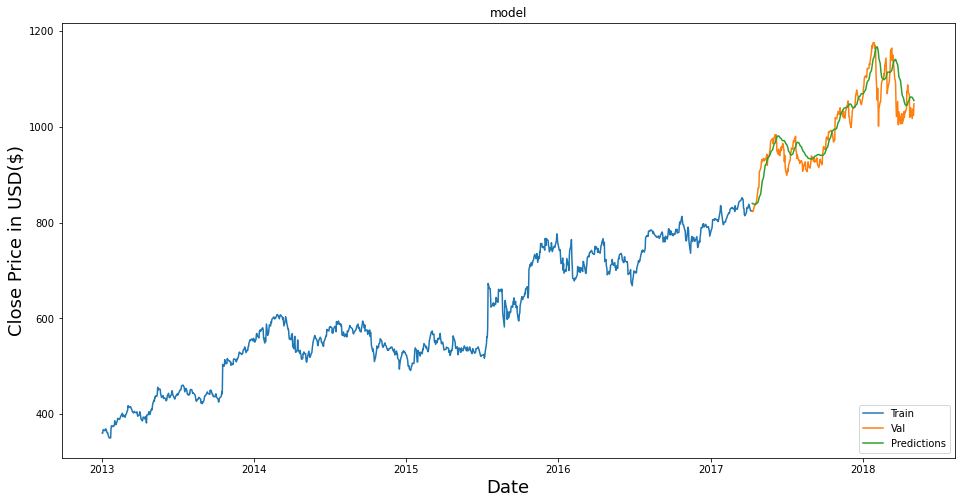

In [24]:
train=df_close[:training_data]
valid=df_close[training_data:]
valid['Predict']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price in USD($)", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predict']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()
    

In [25]:
#New Prediction to see how the model works

import pandas_datareader as web
google_quote=web.DataReader('GOOG', data_source='yahoo', start='2015-01-01', end='2020-12-12')
new_df = google_quote.filter(['Close'])
#getting the last 60 days and converting df to array
sixty_days= new_df[-60:].values
#scaling data to be between 0 and 1
sixty_day_scaled=scaler.transform(sixty_days)
#create empty lists
X_test=[]
X_test.append(sixty_day_scaled)
X_test=np.array(X_test)
#reshaping
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#pred
pred_price=model.predict(X_test)
#inverse
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[1700.213]]


In [26]:
google_quote2=web.DataReader('GOOG', data_source='yahoo', start='2020-12-11', end='2020-12-11')
print(google_quote2)

                   High   Low         Open       Close   Volume   Adj Close
Date                                                                       
2020-12-11  1784.449951  1760  1763.060059  1781.77002  1220700  1781.77002
